<a href="https://colab.research.google.com/github/S-15-77/Image-to-Speech./blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image to Text

In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

In [ ]:
import requests
from PIL import Image
import torch
from transformers import BitsAndBytesConfig

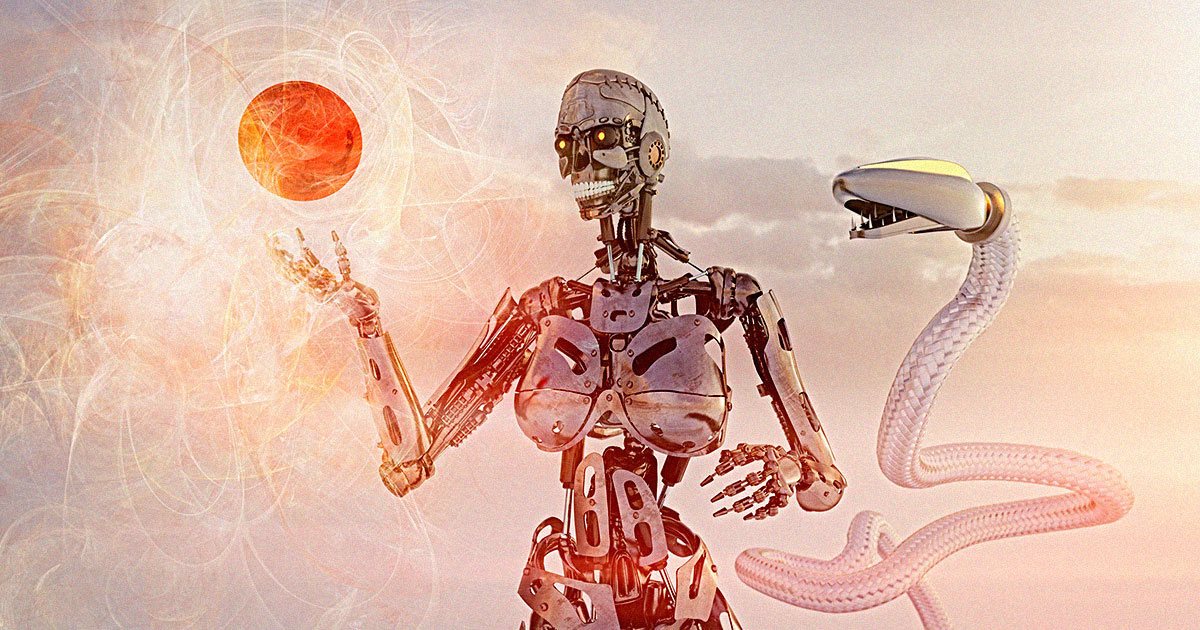

In [ ]:
image_url = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwp-assets.futurism.com%2F2023%2F02%2Fmicrosofts-bing-ai-leaking-maniac-alternate-personalities.jpg&f=1&nofb=1&ipt=18df9da0e50e0e1506f8fa84d139b2d130f866a5b7e9cf26eab1948324e40d75&ipo=images"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [ ]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
pixel_values = pixel_values.to(device)

In [ ]:
kwargs = {"max_length": 200, "num_beams": 4}
outputs = model.generate(pixel_values ,**kwargs)

In [ ]:
preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
preds = [pred.strip() for pred in preds]
# return preds

In [ ]:
print(preds[0])

a statue of a person with a gun in a costume


**Story Generator**

In [ ]:
!pip install langchain

In [ ]:
from langchain import PromptTemplate,LLMChain,OpenAI

In [ ]:
!pip install openai==0.28

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = '<OPENAI_API_KEY>'

In [ ]:
template = f'''
You are a Story teller,
You can generate a short story based on a simple narrative,the story should be no more than 50 words

CONTEXT :  {preds[0]}
STORY :
'''
prompt = PromptTemplate(template=template, input_variables=['preds[0]'])
story_llm = LLMChain(llm=OpenAI(model_name= "gpt-3.5-turbo",temperature=0.4),prompt=prompt,verbose=True)

/usr/local/lib/python3.10/dist-packages/langchain_community/llms/openai.py:249: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain_community/llms/openai.py:1070: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


In [ ]:
story = story_llm.predict(scenario = preds[0])
print(story)



> Entering new LLMChain chain...
Prompt after formatting:

You are a Story teller,
You can generate a short story based on a simple narrative,the story should be no more than 50 words

CONTEXT :  a statue of a person with a gun in a costume
STORY : 


> Finished chain.
In the town square stood a statue of a mysterious figure, dressed in a costume with a gun in hand. Rumors spread about the person's past, some saying they were a hero, others claiming they were a villain. The statue remained silent, leaving the truth shrouded in mystery.


Text to speech


In [ ]:
from transformers import VitsTokenizer, VitsModel, set_seed
import torch

In [ ]:
tokenizer = VitsTokenizer.from_pretrained("facebook/mms-tts-eng")
model = VitsModel.from_pretrained("facebook/mms-tts-eng")

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/mms-tts-eng were not used when initializing VitsModel: ['flow.flows.0.wavenet.in_layers.0.weight_g', 'flow.flows.0.wavenet.in_layers.0.weight_v', 'flow.flows.0.wavenet.in_layers.1.weight_g', 'flow.flows.0.wavenet.in_layers.1.weight_v', 'flow.flows.0.wavenet.in_layers.2.weight_g', 'flow.flows.0.wavenet.in_layers.2.weight_v', 'flow.flows.0.wavenet.in_layers.3.weight_g', 'flow.flows.0.wavenet.in_layers.3.weight_v', 'flow.flows.0.wavenet.res_skip_layers.0.weight_g', 'flow.flows.0.wavenet.res_skip_layers.0.weight_v', 'flow.flows.0.wavenet.res_skip_layers.1.weight_g', 'flow.flows.0.wavenet.res_skip_layers.1.weight_v', 'flow.flows.0.wavenet.res_skip_layers.2.weight_g', 'flow.flows.0.wavenet.res_skip_layers.2.weight_v', 'flow.flows.0.wavenet.res_skip_layers.3.weight_g', 'flow.flows.0.wavenet.res_skip_layers.3.weight_v', 'flow.flows.1.wavenet.in_layers.0.weight_g', 'flow.flows.1.wavenet.in_layers.0.weight_v', 'flow.flows.1.wavenet.in_layers.1.wei

In [ ]:
inputs = tokenizer(text=story, return_tensors="pt")

In [ ]:
with torch.no_grad():
    output = model(**inputs).waveform

In [ ]:
from IPython.display import Audio

Audio(output.numpy(), rate=model.config.sampling_rate)